In [494]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.tsa.stattools

%matplotlib inline

In [495]:
df = pd.read_excel('ResearchDatasetV2.0.xlsx')
print 'Size of Data before filtering unformatted time ', len(df)

Size of Data before filtering unformatted time  667


In [496]:
def Plot2TimeSeries(dataframe, column_names=None, time_format='%Y%m%d'):
    
    if column_names == None:
        print 'Provide Column Names'
        return 
    
    times = pd.to_datetime(dataframe[column_names[0]], format=time_format)
    xfmt = md.DateFormatter(time_format)
    plt.subplot(211)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(md.MonthLocator(interval=7))
    ax.xaxis.set_minor_locator(md.WeekdayLocator())
    plt.plot(times, dataframe[column_names[1]].tolist())

    plt.subplot(212)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(md.MonthLocator(interval=7))
    ax.xaxis.set_minor_locator(md.WeekdayLocator())
    plt.ylim(-5, 5)
    plt.plot(times, dataframe[column_names[2]].tolist())
    
    plt.show()

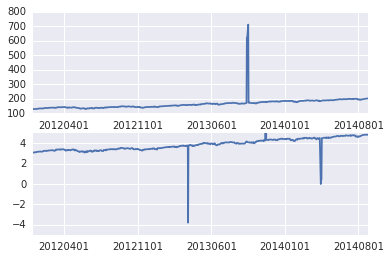

In [497]:
Plot2TimeSeries(df, ['Date', 'ClosePrice', 'Signal'], '%Y%m%d')

In [498]:
#Cleaning Data and Filtering erroneous Data Entries

df = df[pd.notnull(df.Signal)]
df = df[pd.notnull(df.ClosePrice)]

prev_value = df.Signal[0]
change_factor = 0.5
is_valid = []
for value in df.Signal:
    if value < change_factor*prev_value or value > (change_factor+1)*prev_value:
        is_valid.append(False)
    else:
        is_valid.append(True)
        
df = df[is_valid]

prev_value = df.ClosePrice[0]
is_valid = []

for value in df.ClosePrice:
    if value < change_factor*prev_value or value > (change_factor+1)*prev_value:
        is_valid.append(False)
    else:
        is_valid.append(True)
df = df[is_valid]
format = "%Y%m%d"
times = pd.to_datetime(df.Date, format=format)

df = df[pd.notnull(times)]
times = times[pd.notnull(times)]

        
print 'Size of Data after filtering unformatted time ', len(df)

Size of Data after filtering unformatted time  587


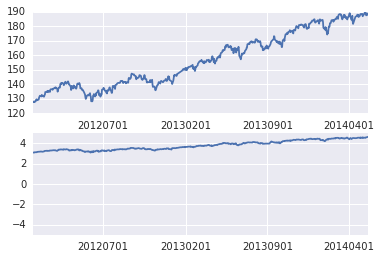

In [499]:
Plot2TimeSeries(df, ['Date', 'ClosePrice', 'Signal'], '%Y%m%d')

In [500]:
print "Max Close Price is at %d"%df[df.ClosePrice == df.ClosePrice.max()].Date
print "Max Signal is at %d"%df[df.Signal == df.Signal.max()].Date

Max Close Price is at 20140513
Max Signal is at 20140519


In [501]:
print "Min Close Price is at %d"%df[df.ClosePrice == df.ClosePrice.min()].Date
print "Min Signal is at %d"%df[df.Signal == df.Signal.min()].Date

Min Close Price is at 20120103
Min Signal is at 20120105


### Testing if the Process is Stationary####
H0: Null Hypothesis for adfuller method is unity root exists or the Process under consideration is not Stationary

H1: Alternate Hypothesis is unity root does not exist or Time Series under consideration is Stationary 

In [502]:
#import statsmodels.api as sm

#def isTimeSeriesStationary(data, sig_val):
#    #sig_val = 0.025
#    tsa = sm.tsa
#    val, p_val = tsa.adfuller(data, autolag='AIC')[:2]
#    print "P_Value is ", p_val
#    if p_val < sig_val:
#        print "Null Hypothesis is False, series is Stationary."
#        return True
#    else:
#        print "Null Hypothesis is True, Series is not Stationary."
#        return False

#if isTimeSeriesStationary((df.Signal), 0.025):
#    print "Time Series for Signal is Stationary."
#else:
#    print "Time Series for Signal is not Stationary."
    
#if isTimeSeriesStationary((df.ClosePrice), 0.025):
#    print "Time Series for ClosePrice is Stationary."
#else:
#    print "Time Series for ClosePrice is not Stationary."
    


/Users/prashantsaxena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/prashantsaxena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


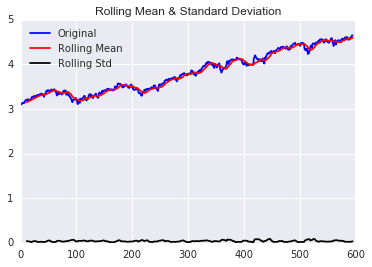

Results of Dickey-Fuller Test:
P-Value is  0.91149227305


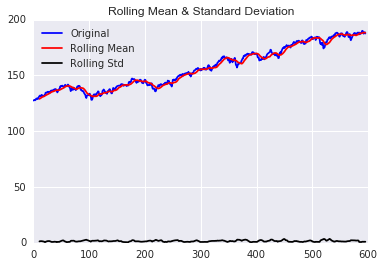

Results of Dickey-Fuller Test:
P-Value is  0.913779297805


In [503]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    val, p_val = adfuller(timeseries, regression='c')[:2]
    print "P-Value is ", p_val
    #dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    #for key,value in dftest[4].items():
    #    dfoutput['Critical Value (%s)'%key] = value
    #print dfoutput
    
test_stationarity(df.Signal)
test_stationarity(df.ClosePrice)

##### Result 1:
As can be inferred from p-value(s) that Null Hypothesis is True(valid).
=> Time Series is not Stationary.

##### Converting Series into Stationary Series

- Taking Log of the Sequence 
- Subtracting Rolling Mean 

/Users/prashantsaxena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app


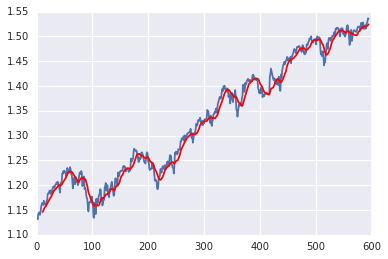

/Users/prashantsaxena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/prashantsaxena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


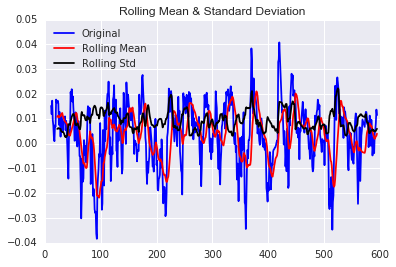

Results of Dickey-Fuller Test:
P-Value is  1.41198507758e-12


In [504]:
signal_log = np.log(df.Signal)
moving_avg = pd.rolling_mean(signal_log,12)
plt.plot(signal_log, label='Signal Log')
plt.plot(moving_avg, color='red', label='Moving Average')
moving_avg_diff = signal_log - moving_avg
moving_avg_diff.dropna(inplace=True)
plt.show()
test_stationarity(moving_avg_diff)

##### Result 2:
After taking Log and subtracting Rolling Mean, Signal is now Stationary.

/Users/prashantsaxena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app
/Users/prashantsaxena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/prashantsaxena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


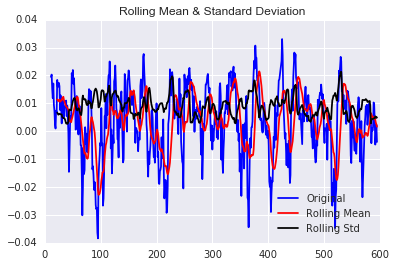

Results of Dickey-Fuller Test:
P-Value is  1.16611423013e-11


In [505]:
cp_log = np.log(df.ClosePrice)
cp_mavg = pd.rolling_mean(cp_log,12)
cp_mavg_diff = cp_log - cp_mavg
cp_mavg_diff.dropna(inplace=True)
test_stationarity(cp_mavg_diff)

In [506]:
#Defining Cross Correlation Function. 
#datax: Sequence 1
#datay: Sequence 2
#lag: Lag between two Sequences

def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

Computing corretation of two series (ClosePrice and Signal). It gives a good indicator that series are related.


0    0.993664
1    0.995003
2    0.996679
3    0.996859
4    0.996576
dtype: float64


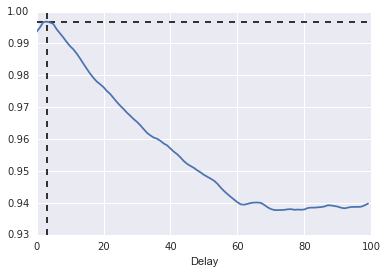

Maximum correlation between Signal and ClosePrice is  0.996859026782 for delay 3


In [507]:
crosscorr_list = []
delay_list     = []

close_price_diff = pd.Series(np.diff((df.ClosePrice)))
signal_diff      = pd.Series(np.diff((df.Signal)))

for delay in range(0, 100):
    crosscorr_list.append(crosscorr(pd.Series((df.ClosePrice)), pd.Series((df.Signal)), delay))
    #crosscorr_list.append(crosscorr(close_price_diff, signal_diff, delay))
    delay_list.append(delay)
    
print pd.Series(crosscorr_list).head()
fig, ax = plt.subplots()
##ax.set_yticks([np.max(crosscorr_list)])
##ax.set_xticks()
ax.axhline(np.max(crosscorr_list), linestyle='--', color='k')
ax.axvline(np.argmax(crosscorr_list), linestyle='--', color='k')
ax.set_xlabel('Delay')
plt.plot(delay_list, crosscorr_list)

plt.show()
print "Maximum correlation between Signal and ClosePrice is ", np.max(crosscorr_list) \
    ,"for delay %d"%np.argmax(crosscorr_list)

##### Result 3:
Intutively saying Signal should correlate with ClosePrice

###### Testing Causality using Granger Causality Test.
Because transformed(Signal) and transformed(ClosePrice) are stationary processes, we would use them to test causality. 

transformed: Here means log difference with rollingmean 

In [508]:
#We will compute Granger Causality Test to check if Signal can be used to predict ClosePrice.
input_ = df.as_matrix(['ClosePrice', 'Signal'])
input_diff = np.column_stack([cp_mavg_diff, moving_avg_diff]) 
isCausal = False
if statsmodels.tsa.stattools.grangercausalitytests(input_diff, 10, verbose=True):
    isCausal = True


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=120.1720, p=0.0000  , df_denom=572, df_num=1
ssr based chi2 test:   chi2=120.8023, p=0.0000  , df=1
likelihood ratio test: chi2=109.6499, p=0.0000  , df=1
parameter F test:         F=120.1720, p=0.0000  , df_denom=572, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=138.8179, p=0.0000  , df_denom=569, df_num=2
ssr based chi2 test:   chi2=280.0755, p=0.0000  , df=2
likelihood ratio test: chi2=228.1020, p=0.0000  , df=2
parameter F test:         F=138.8179, p=0.0000  , df_denom=569, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=93.2904 , p=0.0000  , df_denom=566, df_num=3
ssr based chi2 test:   chi2=283.3324, p=0.0000  , df=3
likelihood ratio test: chi2=230.2159, p=0.0000  , df=3
parameter F test:         F=93.2904 , p=0.0000  , df_denom=566, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=

In [509]:
if isCausal == True:
    print "Signal is Causal with Closing Price."
else:
    print "Signal is not Causal with Closing Price."

Signal is Causal with Closing Price.


##### Result 4:
f_value from f_test is high enough (138.82 for Lag=2) to infer that Signal is causal with ClosePrice

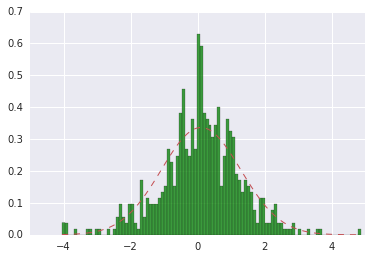

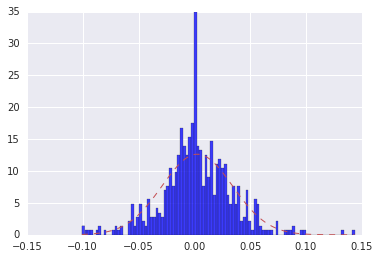

In [510]:
#Analyzing the Data 
#Analyzing the data and drawing Sample Distribution (Histogram)
#[Inference]: Sample Distribution for Stationary Series np.diff(ClosePrice)

import matplotlib.mlab as mlab
mu    = pd.Series(np.diff(df.ClosePrice)).mean()
sigma = pd.Series(np.diff(df.ClosePrice)).std()
n, bins, patches = plt.hist(np.diff(df.ClosePrice), 100, normed=1, facecolor='green', alpha=0.75)

#Comparing it against Normal Distribution 
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.show()

import matplotlib.mlab as mlab
mu    = pd.Series(np.diff(df.Signal)).mean()
sigma = pd.Series(np.diff(df.Signal)).std()
n, bins, patches = plt.hist(np.diff(df.Signal), 100, normed=1, facecolor='blue', alpha=0.75)

#Comparing it against Normal Distribution 
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.show()


Transformed Signal and ClosePrice and Stationary Process and Normally (Gaussian) Distributed.

##### Predicting Transformed ClosePrice from Transformed Signal


In [511]:
def rolling_window(a, window):
    shape   = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)



Mean is 0.004056, Mean Standard Squared Error is  0.000111342748754


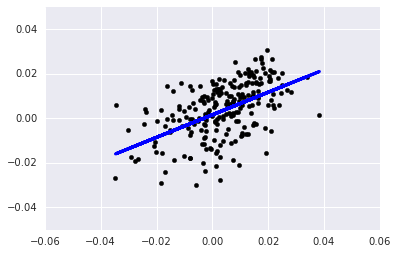

Mean is 0.004056, Mean Standard Squared Error is  0.000111540695538


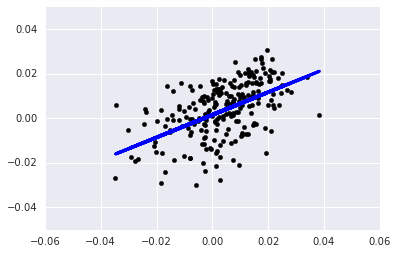

Mean is 0.004056, Mean Standard Squared Error is  0.00011157190936


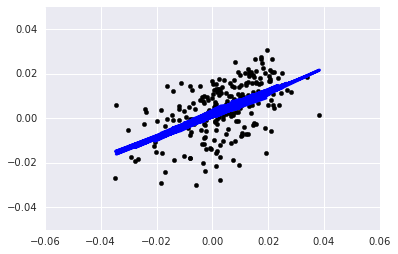

Mean is 0.004056, Mean Standard Squared Error is  0.000112122345255


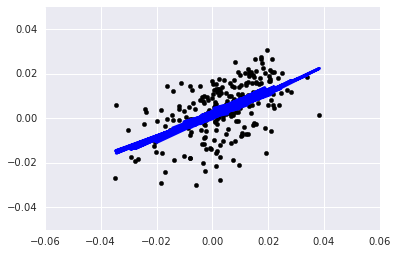

Mean is 0.004056, Mean Standard Squared Error is  0.000112616142546


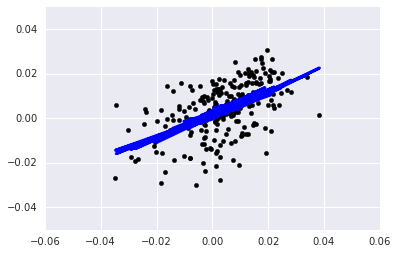

Mean is 0.004056, Mean Standard Squared Error is  0.000112688536063


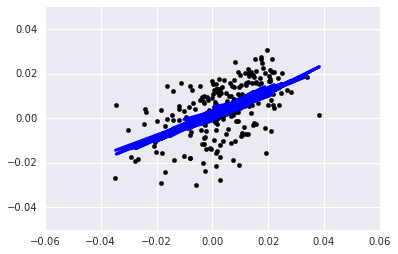

Mean is 0.004056, Mean Standard Squared Error is  0.000113015486569


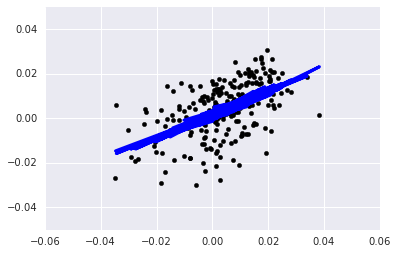

Mean is 0.004056, Mean Standard Squared Error is  0.000113629903661


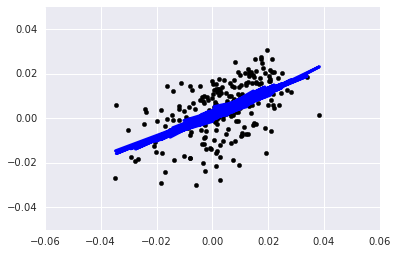

Mean is 0.004056, Mean Standard Squared Error is  0.000113794433163


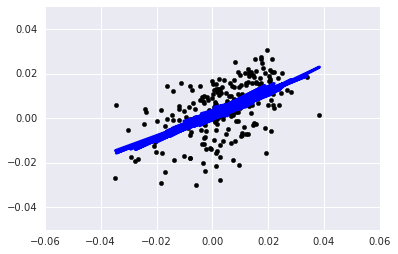

In [513]:
#### import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn import linear_model
import sklearn.metrics


length = len(moving_avg_diff)

signals      = (moving_avg_diff).reshape(length,1)
close_prices = (cp_mavg_diff).reshape(length,1)

#Splitting Data into Training and Test Data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
signals, close_prices, test_size=0.4, random_state=0)


#print (X_train.shape), len(y_train)
mssr_list  = []
depth_list = range(1,10)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_hat = y_hat = regr.predict(X_test)
mssr = sklearn.metrics.mean_squared_error(y_test, y_hat)
mssr_list.append(mssr)
print "Mean is %f, Mean Standard Squared Error is "%y_test.mean(), mssr
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_hat, color='blue', linewidth=3)
plt.show()

#Considering MultiVariate Distribution 
for depth in depth_list[1:]:
    X = rolling_window(pd.Series(X_train.reshape( len(X_train),)),depth)
    regr = linear_model.LinearRegression()
    regr.fit( X, y_train[0:-(depth-1)])
    
    plt.scatter(X_test, y_test,  color='black')
    X = rolling_window(pd.Series(X_train.reshape( len(X_train),)),depth)
    y_hat = regr.predict(rolling_window(X_test.reshape( len(X_test),), depth))
    
    mssr = sklearn.metrics.mean_squared_error(y_test[0:-(depth-1)], y_hat)
    mssr_list.append(mssr)
    print "Mean is %f, Mean Standard Squared Error is "%y_test.mean(), mssr
    plt.plot(X_test[0:-(depth-1)], y_hat, color='blue', linewidth=3)
    plt.show()
    

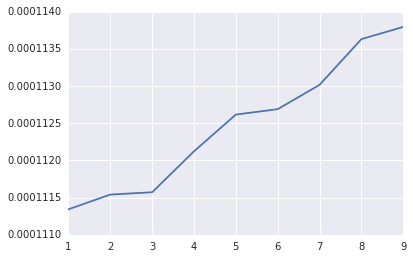

In [514]:
plt.plot(depth_list, mssr_list)

##### Result:
Lowest MSE (Mean Squared Error) is obtained for Single Variable Linear Regression i.e considering signal[t] to predict close_price[t].
Considering it as a Multi Variate Solution with signal[t], signal[t-1],... signal[t-k] to predict close_price[t] gives a less optimum solution as MSE (Mean Squared Error) is higher.

Plotting Transformed ClosePrice and Signal on a Scatter Plot.

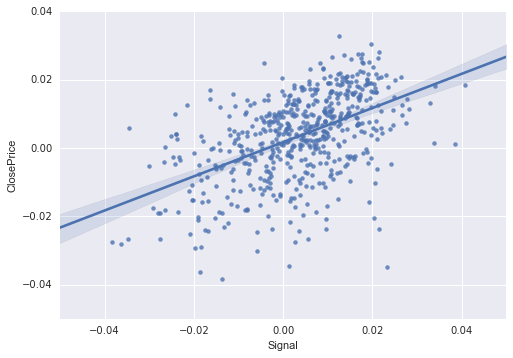

In [516]:
import seaborn as sns; 
sns.set(color_codes=True)
df_diff = {'Signal':moving_avg_diff, 'ClosePrice':cp_mavg_diff}
ax = sns.regplot(x="Signal", y="ClosePrice", data=df_diff)

##### Result and Conclusion:

From this analysis we conclude following.
- Close Price and Signal Time series are not Stationary. But they can be converted into a stationary series through log Transform and taking a rolling mean diff.
- Transformed sequences have Gaussian Distribution.
- Transformed series are Causal as they pass Granger Causality Test. 
- Linear Regression doesnot provide a satisfactory solution to predict the ClosePrice from Signal  

#### Questions:
    - I was hoping to see more flatter STD in the Plot (Results of Dickey-Fuller Test) because of logarithm operation. 
    - I can still make these time series Stationary just by taking rolling mean difference and removing logarithmic   operation, should I remove it? 
    - I couldn't come up with any other approach to predict ClosePrice but Linear Regression. I explored a pew other    Predictive Approaches like ARIMA but I guess they solve a different used case? They are purely "Auto Regressive" and don't take into account any other time series?
    - Good references on Time Series Analysis?